<a href="https://colab.research.google.com/github/chenwh0/Natural-Language-Processing-work/blob/main/module1/NLPTextPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Text Preprocessing
Normalize, tokenize, and analyze text data while comparing library outputs and performing part-of-speech analysis.
# *Sources*
* https://www.geeksforgeeks.org/python/python-regex/

# *Installs & Imports*

In [ ]:
!pip install spacy nltk pandas matplotlib -q

In [ ]:
!python -m spacy download en_core_web_sm  # Run if the model isn't installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re # To remove punctuation in given str
import pandas # To visualize table of different words
import matplotlib.pyplot as plt # To visualize histogram of differences

import spacy # spaCy functions

import nltk
from nltk.tokenize import word_tokenize # NLTK tokenizer function
from nltk.stem import WordNetLemmatizer # NLTK lemmatizer function
from nltk.corpus import stopwords # To remove stopwords in NLTK
from nltk import pos_tag # To tag POS
from nltk.corpus import wordnet # To tag POS

In [ ]:
# NLTK downloads (run once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords') # stopword
nltk.download('wordnet') # lematizer
nltk.download('omw-1.4') # lematizer
nltk_stopwords = set(stopwords.words("english")) # Load English stopwords once for efficiency
nltk.download('averaged_perceptron_tagger_eng') # POS-tagger

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

# **1. Text Normalization and Tokenization**

a. Selected a sentence from Mary Shelley's *Frankenstein*

b. Implemented text normalization:
1. Convert to lowercase.
2. Remove punctuation/digits.
3. Handle whitespace.

c. Tokenized with NLTK & spaCy

In [ ]:
original_text = "Hateful day when I received life!' I exclaimed in agony. 'Accursed creator! Why did you form a monster so hideous that even you turned from me in disgust? God, in pity, made man beautiful and alluring, after his own image; but my form is a filthy type of yours, more horrid even from the very resemlance. Satan had his companions, fellow-devils, to admire and encourage him; but I am solitary and abhorred.' ― Mary Shelley, Frankenstein"
normalized_text = original_text.lower() # 1. Convert to lowercase
normalized_text = re.sub(r"[^a-z\s]", "", normalized_text) # 2. Remove puncuation/digits
normalized_text = re.sub(r"[\s]{2,}", " ", normalized_text) # 3. Remove extra whitespace, converting it to only 1 whitespace
print("Original:", original_text)
print("Normalized:", normalized_text)

Original: Hateful day when I received life!' I exclaimed in agony. 'Accursed creator! Why did you form a monster so hideous that even you turned from me in disgust? God, in pity, made man beautiful and alluring, after his own image; but my form is a filthy type of yours, more horrid even from the very resemlance. Satan had his companions, fellow-devils, to admire and encourage him; but I am solitary and abhorred.' ― Mary Shelley, Frankenstein
Normalized: hateful day when i received life i exclaimed in agony accursed creator why did you form a monster so hideous that even you turned from me in disgust god in pity made man beautiful and alluring after his own image but my form is a filthy type of yours more horrid even from the very resemlance satan had his companions fellowdevils to admire and encourage him but i am solitary and abhorred mary shelley frankenstein


In [ ]:
# spaCy tokenization
spacy_model = spacy.load('en_core_web_sm')
document = spacy_model(normalized_text)
spacy_tokens = [token.text for token in document]
print("spaCy tokens:", spacy_tokens)

# NLTK tokenization
nltk_tokens = word_tokenize(normalized_text)
print("NLTK tokens:", nltk_tokens)

spaCy tokens: ['hateful', 'day', 'when', 'i', 'received', 'life', 'i', 'exclaimed', 'in', 'agony', 'accursed', 'creator', 'why', 'did', 'you', 'form', 'a', 'monster', 'so', 'hideous', 'that', 'even', 'you', 'turned', 'from', 'me', 'in', 'disgust', 'god', 'in', 'pity', 'made', 'man', 'beautiful', 'and', 'alluring', 'after', 'his', 'own', 'image', 'but', 'my', 'form', 'is', 'a', 'filthy', 'type', 'of', 'yours', 'more', 'horrid', 'even', 'from', 'the', 'very', 'resemlance', 'satan', 'had', 'his', 'companions', 'fellowdevils', 'to', 'admire', 'and', 'encourage', 'him', 'but', 'i', 'am', 'solitary', 'and', 'abhorred', 'mary', 'shelley', 'frankenstein']
NLTK tokens: ['hateful', 'day', 'when', 'i', 'received', 'life', 'i', 'exclaimed', 'in', 'agony', 'accursed', 'creator', 'why', 'did', 'you', 'form', 'a', 'monster', 'so', 'hideous', 'that', 'even', 'you', 'turned', 'from', 'me', 'in', 'disgust', 'god', 'in', 'pity', 'made', 'man', 'beautiful', 'and', 'alluring', 'after', 'his', 'own', 'image

# **2. Stopword Removal and Lemmatization**


In [ ]:
# spaCy remove stopwords
spacy_no_stopwords_tokens = [token.text for token in document if not token.is_stop] # Store only the non-stopwords
print("spaCy tokens with Stopwords:", spacy_tokens)
print("spaCy tokens no Stopwords:", spacy_no_stopwords_tokens)
print()

# nltk remove stopwords
nltk_no_stopwords_tokens = [token for token in nltk_tokens if token not in nltk_stopwords] # Store only the non-stopwords
print("NLTK tokens with Stopwords", nltk_tokens)
print("NLTK tokens no Stopwords", nltk_no_stopwords_tokens)

spaCy tokens with Stopwords: ['hateful', 'day', 'when', 'i', 'received', 'life', 'i', 'exclaimed', 'in', 'agony', 'accursed', 'creator', 'why', 'did', 'you', 'form', 'a', 'monster', 'so', 'hideous', 'that', 'even', 'you', 'turned', 'from', 'me', 'in', 'disgust', 'god', 'in', 'pity', 'made', 'man', 'beautiful', 'and', 'alluring', 'after', 'his', 'own', 'image', 'but', 'my', 'form', 'is', 'a', 'filthy', 'type', 'of', 'yours', 'more', 'horrid', 'even', 'from', 'the', 'very', 'resemlance', 'satan', 'had', 'his', 'companions', 'fellowdevils', 'to', 'admire', 'and', 'encourage', 'him', 'but', 'i', 'am', 'solitary', 'and', 'abhorred', 'mary', 'shelley', 'frankenstein']
spaCy tokens no Stopwords: ['hateful', 'day', 'received', 'life', 'exclaimed', 'agony', 'accursed', 'creator', 'form', 'monster', 'hideous', 'turned', 'disgust', 'god', 'pity', 'man', 'beautiful', 'alluring', 'image', 'form', 'filthy', 'type', 'horrid', 'resemlance', 'satan', 'companions', 'fellowdevils', 'admire', 'encourage',

In [ ]:
# spaCy lemmatization
spacy_lemmatized_tokens = [token.lemma_ for token in spacy_model(" ".join(spacy_no_stopwords_tokens))]
print("spaCy tokens with no lemmatization:", spacy_no_stopwords_tokens)
print("spaCy tokens with lemmatization", spacy_lemmatized_tokens)
print()

# NLTK lemmatization
lemmatizer = WordNetLemmatizer()
nltk_lemmatized_adjectives = [lemmatizer.lemmatize(token, pos="a") for token in nltk_no_stopwords_tokens] # 'a' for adjective; Ex: Input: better. Output: good
nltk_lemmatized_nouns = [lemmatizer.lemmatize(token, pos="a") for token in nltk_no_stopwords_tokens] # 'a' for adjective; Ex: Input: better. Output: good
nltk_lemmatized_tokens = [lemmatizer.lemmatize(token, pos="v") for token in nltk_lemmatized_nouns] # 'v' for verb; Input: ran. Output: run
print("NLTK tokens with no lemmatization:", nltk_no_stopwords_tokens)
print("NLTK tokens with lemmatization", nltk_lemmatized_tokens)

spaCy tokens with no lemmatization: ['hateful', 'day', 'received', 'life', 'exclaimed', 'agony', 'accursed', 'creator', 'form', 'monster', 'hideous', 'turned', 'disgust', 'god', 'pity', 'man', 'beautiful', 'alluring', 'image', 'form', 'filthy', 'type', 'horrid', 'resemlance', 'satan', 'companions', 'fellowdevils', 'admire', 'encourage', 'solitary', 'abhorred', 'mary', 'shelley', 'frankenstein']
spaCy tokens with lemmatization ['hateful', 'day', 'receive', 'life', 'exclaim', 'agony', 'accurse', 'creator', 'form', 'monster', 'hideous', 'turn', 'disgust', 'god', 'pity', 'man', 'beautiful', 'alluring', 'image', 'form', 'filthy', 'type', 'horrid', 'resemlance', 'satan', 'companion', 'fellowdevil', 'admire', 'encourage', 'solitary', 'abhor', 'mary', 'shelley', 'frankenstein']

NLTK tokens with no lemmatization: ['hateful', 'day', 'received', 'life', 'exclaimed', 'agony', 'accursed', 'creator', 'form', 'monster', 'hideous', 'even', 'turned', 'disgust', 'god', 'pity', 'made', 'man', 'beautiful

In [ ]:
different_words = {"spacy_words": ["", "", "alluring", "", "fellowdevil"], "nltk_words": ["even", "make", "allure", "even", "fellowdevils"]}
differences = pandas.DataFrame(different_words)
print("Token differences after removing stopwords AND conducting lemmatization via spaCy or NLTK functions:")
differences

Token differences after removing stopwords AND conducting lemmatization via spaCy or NLTK functions:


,spacy_words,nltk_words
0,,even
1,,make
2,alluring,allure
3,,even
4,fellowdevil,fellowdevils


spaCy stopword removal removed more words than NLTK stopword removal. For example the words "even" and 2 "make"s2 were removed from spaCy tokens whereas NLTK kept them. In the word "fellowdevils" (very originally "fellow-devils") was possibly unrecognized by NLTK, therefore it was different from spaCy and did not remove the plurality 's' as both NLTK and spaCy did with the word "companions" to become "companion". Finally, "alluring" was seen as a verb & lemmatized by NLTK while spaCy recognized "alluring" as a description and thus left the token alone

# **3. POS Tagging Analysis**


In [ ]:
def spacy_get_wordnet_pos(spacy_tag):
    """Convert NLTK POS tags to WordNet POS tags"""
    if spacy_tag.startswith('N'):
        return wordnet.NOUN
    elif spacy_tag.startswith('V'):
        return wordnet.VERB
    elif spacy_tag.startswith("ADJ"):
        return wordnet.ADJ
    elif spacy_tag.startswith("ADV"):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

def nltk_get_wordnet_pos(nltk_tag):
    """Convert NLTK POS tags to WordNet POS tags"""
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

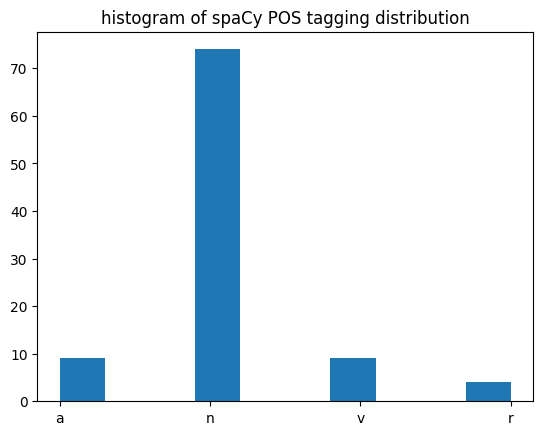

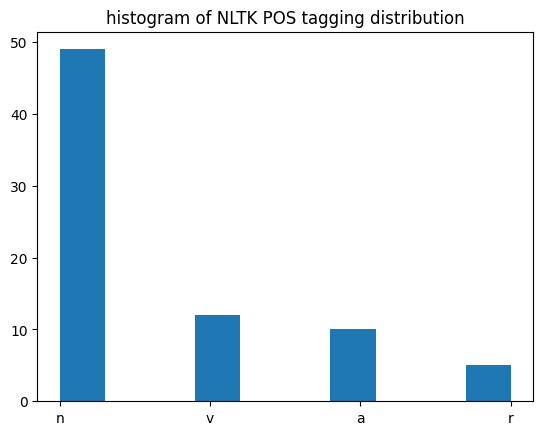

In [ ]:
# spaCy tag POS
document = spacy_model(original_text)
spacy_pos_tokens = [spacy_get_wordnet_pos(token.pos_) for token in document]
plt.hist(spacy_pos_tokens)
plt.title("histogram of spaCy POS tagging distribution")
plt.show()

# NLTK tag POS
nltk_pos_tokens = [nltk_get_wordnet_pos(pos) for word, pos in nltk.pos_tag(original_text.split(' '))]
plt.hist(nltk_pos_tokens)
plt.title("histogram of NLTK POS tagging distribution")
plt.show()

In [ ]:
# Store in respective word-tag pairs for each library
spacy_dict = {key: value for key, value in zip([token.text for token in document], spacy_pos_tokens)}
nltk_dict = {key: value for key, value in zip(original_text.split(' '), nltk_pos_tokens)}

# Display 3 conflicting spaCy vs NLTK tags for 3 words
pos_differences = pandas.DataFrame({"word": ["Hateful", "creator/creator!", "Accursed/'Accursed"],
                                "spacy_tag": [spacy_dict["Hateful"],spacy_dict["creator"], spacy_dict["Accursed"]],
                                "nltk_tag": [nltk_dict["Hateful"], nltk_dict["creator!"], nltk_dict["'Accursed"]]
                                  })
print("Tag differences after POS-tagging via spaCy or NLTK functions:")
pos_differences

Tag differences after POS-tagging via spaCy or NLTK functions:


,word,spacy_tag,nltk_tag
0,Hateful,a,n
1,creator/creator!,n,a
2,Accursed/'Accursed,n,v


The POS distribution were similar across both histograms but spaCy had more tokens that were then being tagged as nouns.

# **Technical Reflection**
For my text, I thought that spaCy was more correct most of the time. By just picking the first 3 words "Hateful", "creator/creator!", "Accursed/'Accursed", 2 of the POS tags marked by spaCy were more correct than the POS tags assigned by the NLTK. It surprised me that capitalization and punctuation would have such a big impact on the tagging of what are otherwise 2 identical words. This is likely the reason why the assignment recommended beforehand that all the text be lowercased and the punctuations stripped. It really makes a difference!

NLTK is the traditional learning tool that has each possible step of natural language processing such as tokenization, lemmatization, POS-tagging all separated out. I think in a NLP academic/research domain, this is where NLTK will be more helpful because then you can study and learn about how each step of the process (tokenization, lemmatization, POS-tagging) individually affects the final output.
Nevertheless, in the industry, I think spaCy would be more helpful because just writing the 2 lines below:
```python
spacy_model = spacy.load('some_model_name')
document = spacy_model(text)
```

The model automatically handles much of the tasks for you such as returning a document type object containing each token which in it of itself contains the word’s assigned POS tag, its lemma, whether it is considered a stopword or not, etc. This makes it much more efficient to extract basic token information to aid in any kind of NLP decision-making. A potential issue that could arise from this is that one can easily overlook the aggressiveness of the preprocessing because it is so easy to just instinctively run them. For example, spaCy considered “make” as a stopword, even though in the context of my provided text, the word “make” has its purpose (“... God, in pity, made man beautiful and alluring, after his own image;...”) without the word make/made, it is more difficult to understand the meaning behind the sentence: “... God, in pity, man beautiful and alluring…”. This could also be applied to the medical domain for example if a text was “Patient A made their own medicine.” then aggressive spaCy preprocessing may convert it to “Patient A their own medicine.” and without that “made” word, it is easy to assume the original text was simply “Patient A had their own medicine” which informs medical workers of 2 very distinct pieces of knowledge about their patient.